In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../cleaned_data_v2.csv')

In [3]:
X = df.drop('price', axis=1)
y = df['price']

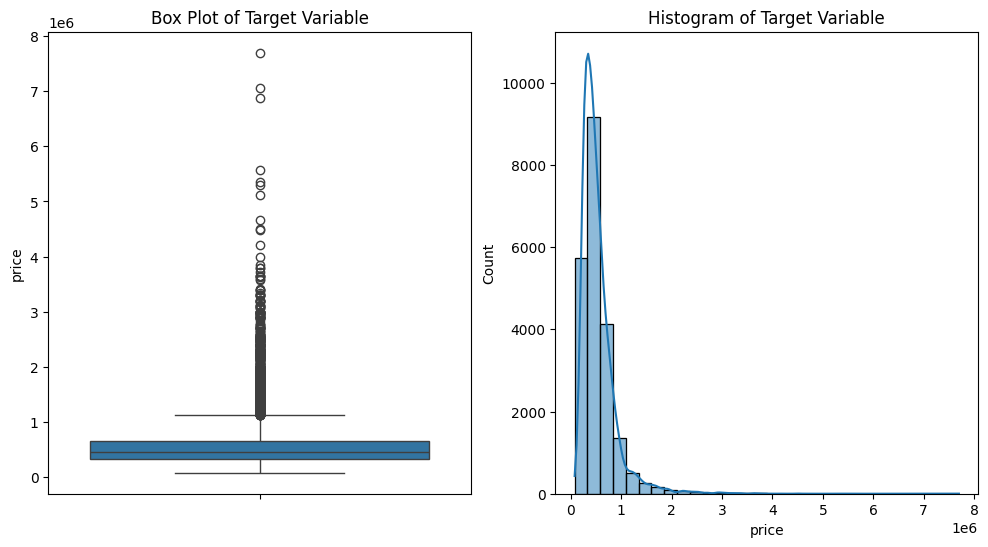

In [4]:


# Assuming 'y' is your target variable
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(y)
plt.title('Box Plot of Target Variable')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(y, bins=30, kde=True)
plt.title('Histogram of Target Variable')

plt.show()

In [5]:
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = y[(y < lower_bound) | (y > upper_bound)]

In [6]:
outliers

5        1225000.0
21       2000000.0
49       1350000.0
69       1325000.0
125      1450000.0
           ...    
21568    1700000.0
21576    3567000.0
21590    1222500.0
21597    1575000.0
21600    1537000.0
Name: price, Length: 1146, dtype: float64

In [7]:
# Remove outliers based on IQR
y_clean = y[(y >= lower_bound) & (y <= upper_bound)]
X_clean = X[(y >= lower_bound) & (y <= upper_bound)]

In [8]:
X_clean

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,nearest_station_distance_km,bathroom_category,density,commute_time,distance_to_point_km,is_near_shore,grade_living
0,3,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,8620.002287,Studio or 1 Bathroom,5364.0,32.9,0.595763,False,8260
1,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,2078.181042,2-3 Bathrooms,7999.0,28.9,3.038596,False,17990
2,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,8109.552186,Studio or 1 Bathroom,3833.0,33.1,2.317669,False,4620
3,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,8918.318639,2-3 Bathrooms,7517.0,30.6,0.101668,True,13720
4,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,19789.800401,1-2 Bathrooms,2896.0,32.7,1.750656,False,13440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346,1372.516972,2-3 Bathrooms,11391.0,27.1,1.708484,False,12240
21609,4,2.50,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362,8505.181320,2-3 Bathrooms,6034.0,29.8,1.990125,False,18480
21610,2,0.75,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299,1942.180508,Studio or 1 Bathroom,9389.0,29.3,0.886906,False,7140
21611,3,2.50,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069,18943.445917,2-3 Bathrooms,487.0,29.3,2.354171,False,12800


In [9]:
X_clean.drop('bathroom_category', axis=1, inplace=True)

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_8222/3933251233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean.drop('bathroom_category', axis=1, inplace=True)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
df.drop('closest_point', axis=1, inplace=True)

In [15]:
df.to_csv('../cleaned_data_v2.csv', index=False)

In [11]:
# Apply one-hot encoding to selected columns
X_clean_encoded = pd.get_dummies(X_clean, columns=['floors', 'view', 'condition', 'zipcode'])

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [13]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_scaled, y_train)

selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_selected)
X_train_clustered = pd.DataFrame(X_train_selected)
X_train_clustered['cluster'] = clusters

In [16]:
X_train_clustered['cluster'].value_counts()

cluster
1    8649
2    4570
0    3154
Name: count, dtype: int64

## Evaluation of Clustering

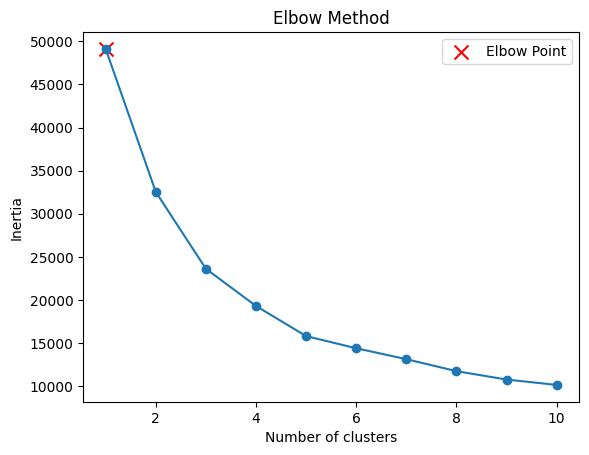

The optimal number of clusters suggested by the Elbow Method is: 1


In [17]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_selected)
    inertia.append(kmeans.inertia_)

# Calculate the differences in inertia
diff = np.diff(inertia)

# Find the index of the "elbow" point
elbow_index = np.argmin(diff) + 1  # Add 1 to match cluster numbers starting from 1

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Highlight the elbow point on the plot
plt.scatter(elbow_index, inertia[elbow_index - 1], color='red', marker='x', s=100, label='Elbow Point')
plt.legend()

plt.show()

print(f"The optimal number of clusters suggested by the Elbow Method is: {elbow_index}")


In [18]:
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples


In [19]:
silhouette_avg = silhouette_score(X_train_selected, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.3367468959508218


## Dimension Reduction

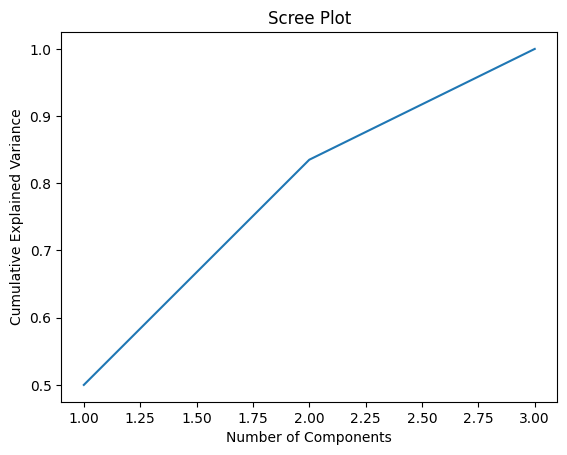

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_selected)
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [21]:
from sklearn.decomposition import PCA

# Create an instance of PCA with the desired number of components
pca = PCA(n_components=3,random_state=42)

# Fit the PCA model to the data and transform the data
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print(f"Total Explained Variance: {np.sum(pca.explained_variance_ratio_)}")


Explained Variance Ratio:
[0.49984885 0.33520923 0.16494192]
Total Explained Variance: 1.0


In [22]:
X_train_pca

array([[ 0.84338459, -0.68323996,  0.96908914],
       [-0.78099027,  0.18435367,  0.28124563],
       [ 1.31615583,  0.94127626, -0.18329895],
       ...,
       [ 0.62695023, -0.54267741,  0.57428263],
       [-0.07510199, -0.92498874,  0.10891418],
       [-1.45263895, -0.07195217,  0.45033768]])

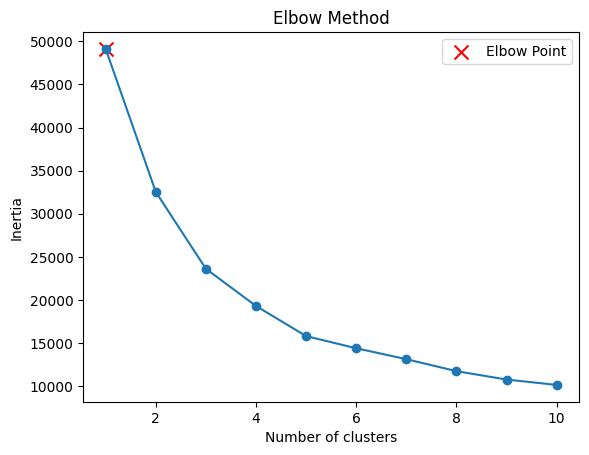

The optimal number of clusters suggested by the Elbow Method is: 1


In [23]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

# Calculate the differences in inertia
diff = np.diff(inertia)

# Find the index of the "elbow" point
elbow_index = np.argmin(diff) + 1  # Add 1 to match cluster numbers starting from 1

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Highlight the elbow point on the plot
plt.scatter(elbow_index, inertia[elbow_index - 1], color='red', marker='x', s=100, label='Elbow Point')
plt.legend()

plt.show()

print(f"The optimal number of clusters suggested by the Elbow Method is: {elbow_index}")


## Reduction without selection

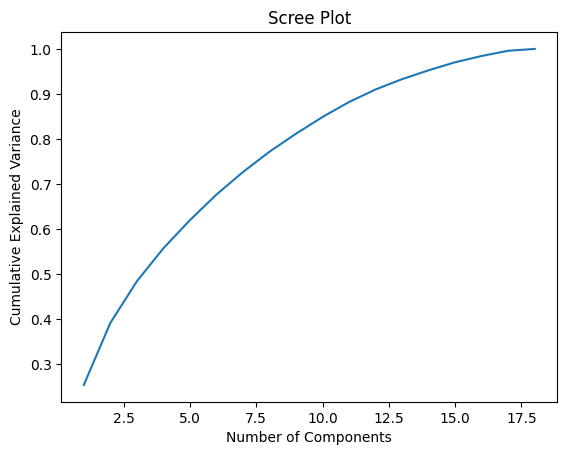

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

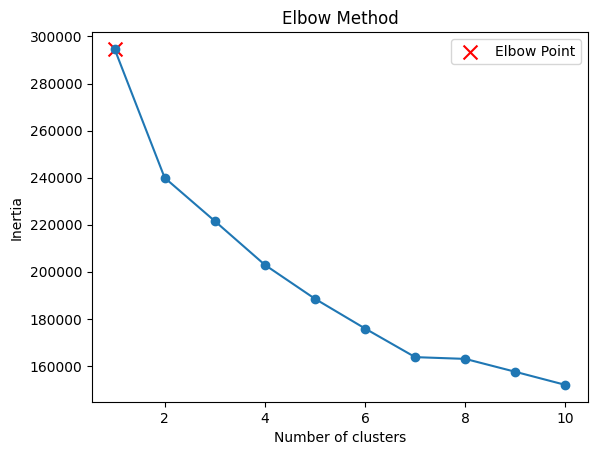

The optimal number of clusters suggested by the Elbow Method is: 1


In [25]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Calculate the differences in inertia
diff = np.diff(inertia)

# Find the index of the "elbow" point
elbow_index = np.argmin(diff) + 1  # Add 1 to match cluster numbers starting from 1

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Highlight the elbow point on the plot
plt.scatter(elbow_index, inertia[elbow_index - 1], color='red', marker='x', s=100, label='Elbow Point')
plt.legend()

plt.show()

print(f"The optimal number of clusters suggested by the Elbow Method is: {elbow_index}")


## DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'eps': [0.1, 0.5, 1.0],
    'min_samples': [5, 10, 15, 20, 50],
}

# Create an instance of DBSCAN
dbscan = DBSCAN()

# Define a custom scoring function using silhouette score
def custom_silhouette_score(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        return silhouette_score(X, labels)
    else:
        return 0  # Return 0 if only one cluster is found

# Create an instance of GridSearchCV with custom scoring
grid_search = GridSearchCV(dbscan, param_grid, scoring=custom_silhouette_score)

# Fit the grid search to the data
grid_search.fit(X_train_scaled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("SCALED DATA")
print("Best Parameters:", best_params)
print("Best Score:", best_score)


SCALED DATA
Best Parameters: {'eps': 0.1, 'min_samples': 5}
Best Score: 0.0


In [27]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5, 2.0],
    'min_samples': [1,2,3,4, 5, 10, 15],
}

# Create an instance of DBSCAN
dbscan = DBSCAN()

# Define a custom scoring function using silhouette score
def custom_silhouette_score(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        return silhouette_score(X, labels)
    else:
        return 0  # Return 0 if only one cluster is found

# Create an instance of GridSearchCV with custom scoring
grid_search = GridSearchCV(dbscan, param_grid, scoring=custom_silhouette_score)

# Fit the grid search to the data
grid_search.fit(X_train_pca)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("AFTER PCA DATA")
print("Best Parameters:", best_params)
print("Best Score:", best_score)


AFTER PCA DATA
Best Parameters: {'eps': 1.0, 'min_samples': 3}
Best Score: 0.5750205600170675


In [28]:
from sklearn.cluster import DBSCAN

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3)

# Fit the DBSCAN model to your data
dbscan.fit(X_train_pca)

# Get the cluster labels for each data point
labels = dbscan.labels_

# Print the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters: 1
Number of noise points: 3


In [29]:
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,nearest_station_distance_km,bathroom_category,density,commute_time,distance_to_point_km,is_near_shore,grade_living
0,221900.0,3,1.00,5650,1.0,0,0,3,1955,0,98178,47.5112,-122.257,8620.002287,Studio or 1 Bathroom,5364.0,32.9,0.595763,False,8260
1,538000.0,3,2.25,7242,2.0,0,0,3,1951,1991,98125,47.7210,-122.319,2078.181042,2-3 Bathrooms,7999.0,28.9,3.038596,False,17990
2,180000.0,2,1.00,10000,1.0,0,0,3,1933,0,98028,47.7379,-122.233,8109.552186,Studio or 1 Bathroom,3833.0,33.1,2.317669,False,4620
3,604000.0,4,3.00,5000,1.0,0,0,5,1965,0,98136,47.5208,-122.393,8918.318639,2-3 Bathrooms,7517.0,30.6,0.101668,True,13720
4,510000.0,3,2.00,8080,1.0,0,0,3,1987,0,98074,47.6168,-122.045,19789.800401,1-2 Bathrooms,2896.0,32.7,1.750656,False,13440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,2009,0,98103,47.6993,-122.346,1372.516972,2-3 Bathrooms,11391.0,27.1,1.708484,False,12240
21609,400000.0,4,2.50,5813,2.0,0,0,3,2014,0,98146,47.5107,-122.362,8505.181320,2-3 Bathrooms,6034.0,29.8,1.990125,False,18480
21610,402101.0,2,0.75,1350,2.0,0,0,3,2009,0,98144,47.5944,-122.299,1942.180508,Studio or 1 Bathroom,9389.0,29.3,0.886906,False,7140
21611,400000.0,3,2.50,2388,2.0,0,0,3,2004,0,98027,47.5345,-122.069,18943.445917,2-3 Bathrooms,487.0,29.3,2.354171,False,12800


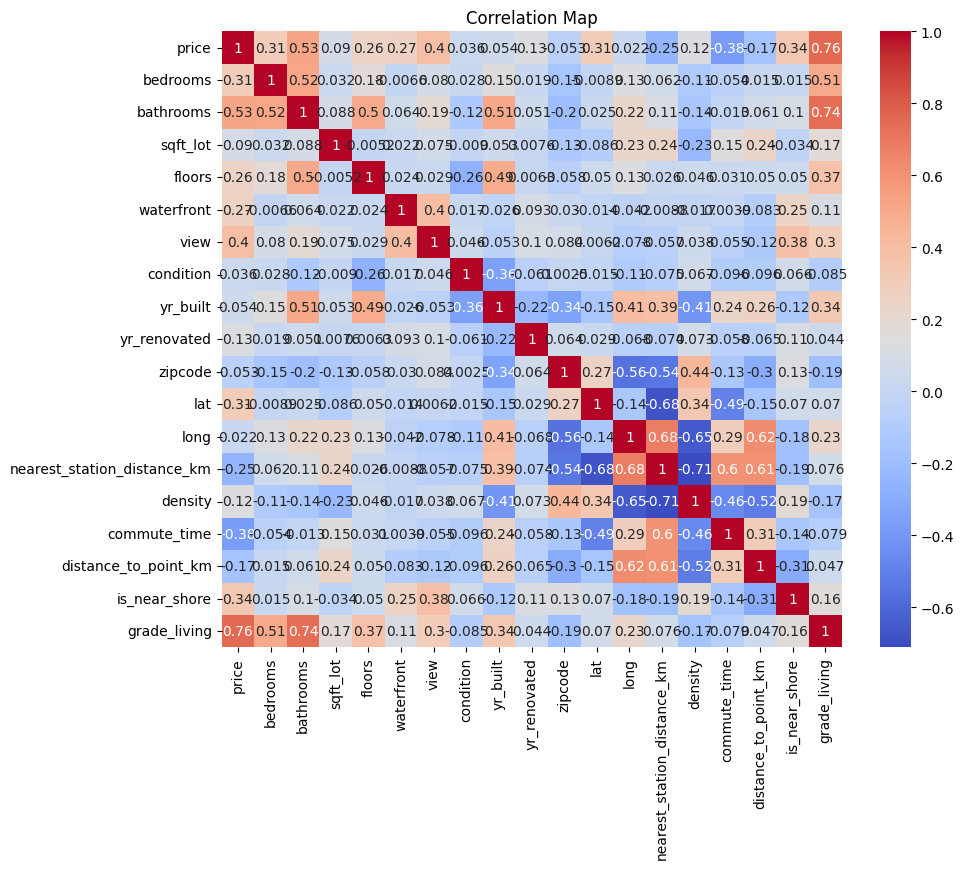

In [30]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.drop(columns='bathroom_category').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


## Combinations

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
combinations = [('grade_living','bathrooms'),
                ('grade_living','view'),
                ('grade_living','sqft_lot'),
                ('grade_living','nearest_station_distance_km'),
                ('grade_living','is_near_shore'),
                ('grade_living','commute_time'),
                ('grade_living','lat'),
                ('grade_living','waterfront')]


# Define a function to perform K-means clustering and calculate silhouette score
def perform_kmeans(data, combination):
# Extract the feature names from the combination
    feature1, feature2 = combination
                    
# Create a subset of the data with the selected features
    subset = data[[feature1, feature2]]

    scaler = StandardScaler()
    subset_scaled = scaler.fit_transform(subset)  
                    
# Perform K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(subset_scaled)
                    
# Calculate the silhouette score
    silhouette_avg = silhouette_score(subset_scaled, clusters)
                    
    return silhouette_avg

# Iterate over each combination and perform K-means clustering
results = {}
for combination in combinations:
    silhouette_avg = perform_kmeans(df, combination)
    results[combination] = silhouette_avg

# Print the results
for combination, silhouette_avg in results.items():
    print(f"Combination: {combination}, Silhouette Score: {silhouette_avg}")


Combination: ('grade_living', 'bathrooms'), Silhouette Score: 0.4731766384434905
Combination: ('grade_living', 'view'), Silhouette Score: 0.6155573141255968
Combination: ('grade_living', 'sqft_lot'), Silhouette Score: 0.60944762310209
Combination: ('grade_living', 'nearest_station_distance_km'), Silhouette Score: 0.4816095492026758
Combination: ('grade_living', 'is_near_shore'), Silhouette Score: 0.6514319386691604
Combination: ('grade_living', 'commute_time'), Silhouette Score: 0.37918787456833847
Combination: ('grade_living', 'lat'), Silhouette Score: 0.437099049586193
Combination: ('grade_living', 'waterfront'), Silhouette Score: 0.6537688967234226


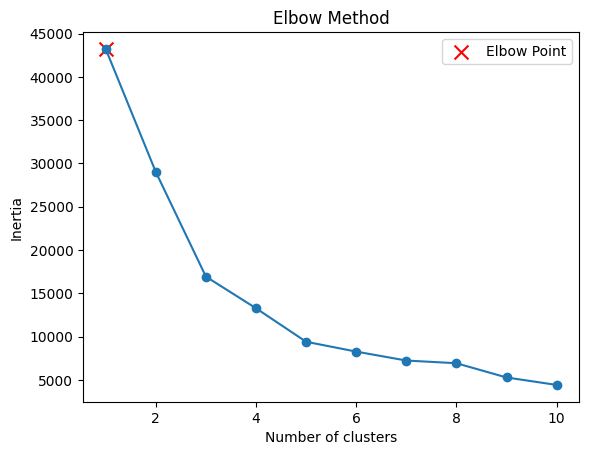

The optimal number of clusters suggested by the Elbow Method is: 1


In [33]:
best_combination_column = df[['grade_living', 'sqft_lot']] 

# scale 
scaler = StandardScaler()
best_combination_column_scaled = scaler.fit_transform(best_combination_column)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(best_combination_column_scaled)
    inertia.append(kmeans.inertia_)

# Calculate the differences in inertia
diff = np.diff(inertia)

# Find the index of the "elbow" point
elbow_index = np.argmin(diff) + 1  # Add 1 to match cluster numbers starting from 1

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Highlight the elbow point on the plot
plt.scatter(elbow_index, inertia[elbow_index - 1], color='red', marker='x', s=100, label='Elbow Point')
plt.legend()

plt.show()

print(f"The optimal number of clusters suggested by the Elbow Method is: {elbow_index}")


In [35]:
# kmeans clustering with silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(best_combination_column_scaled)
silhouette_avg = silhouette_score(best_combination_column_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.60944762310209


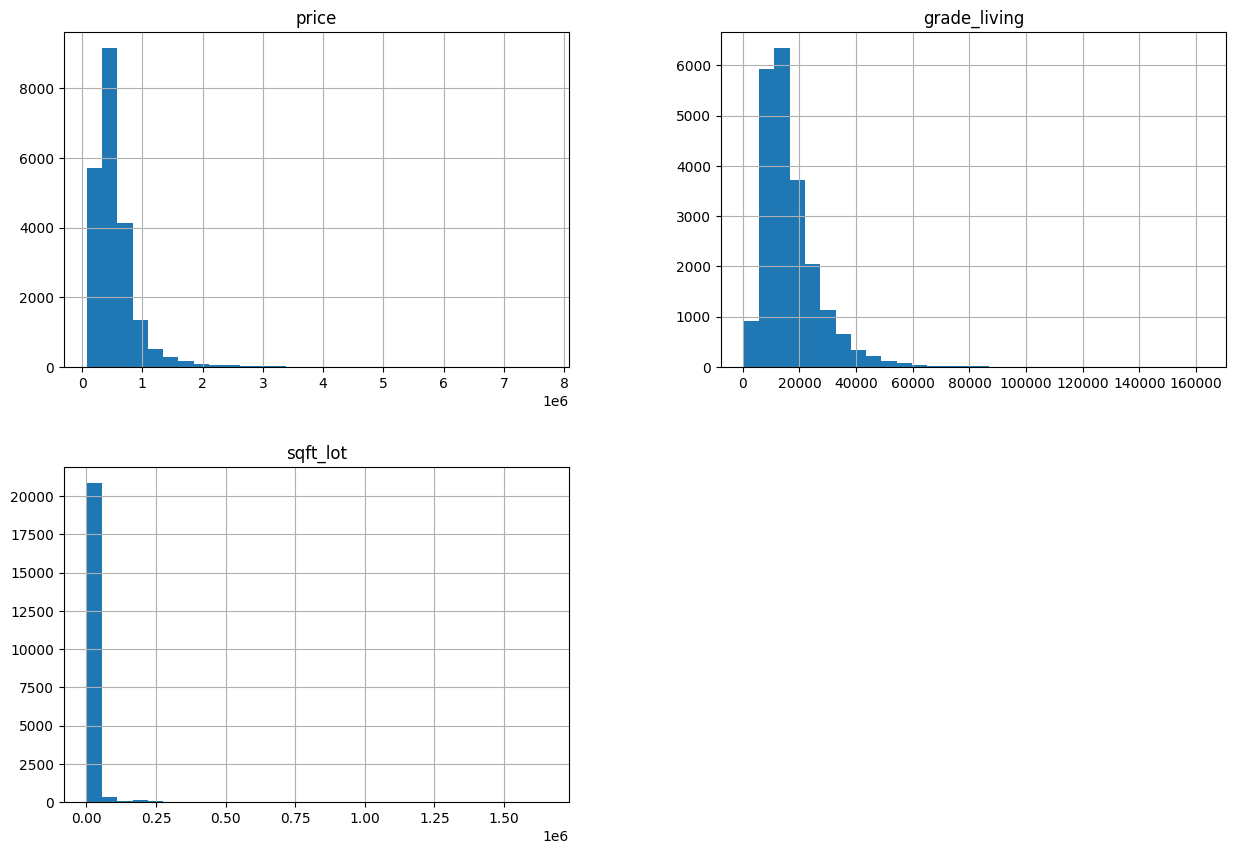

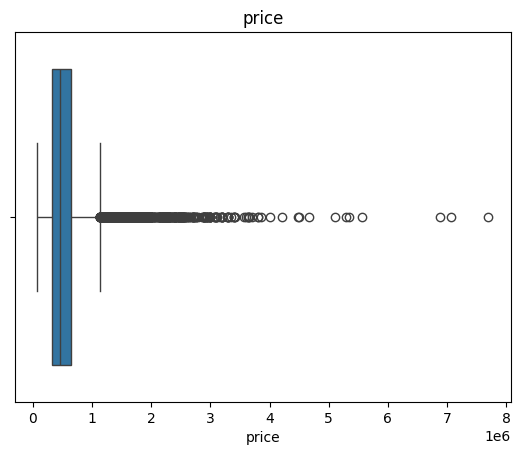

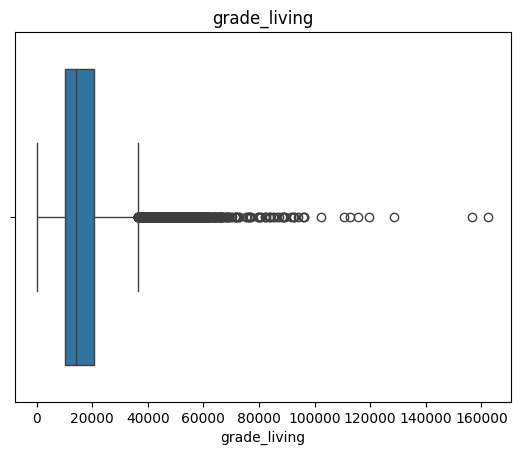

KeyError: 'sqft_living'

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df[['price', 'grade_living', 'sqft_lot']].hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots
for column in ['price', 'grade_living', 'sqft_living']:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()


In [42]:
df_test = pd.read_csv('../cleaned_data_v2.csv')
df_test.drop('bathroom_category', axis=1, inplace=True)
import numpy as np

# Log transform the skewed features (adding a small constant to avoid log(0))
df_test['price_log'] = np.log1p(df_test['price'])
df_test['sqft_lot'] = np.log1p(df_test['sqft_lot'])

df_test['grade_living_log'] = np.log1p(df_test['grade_living'])


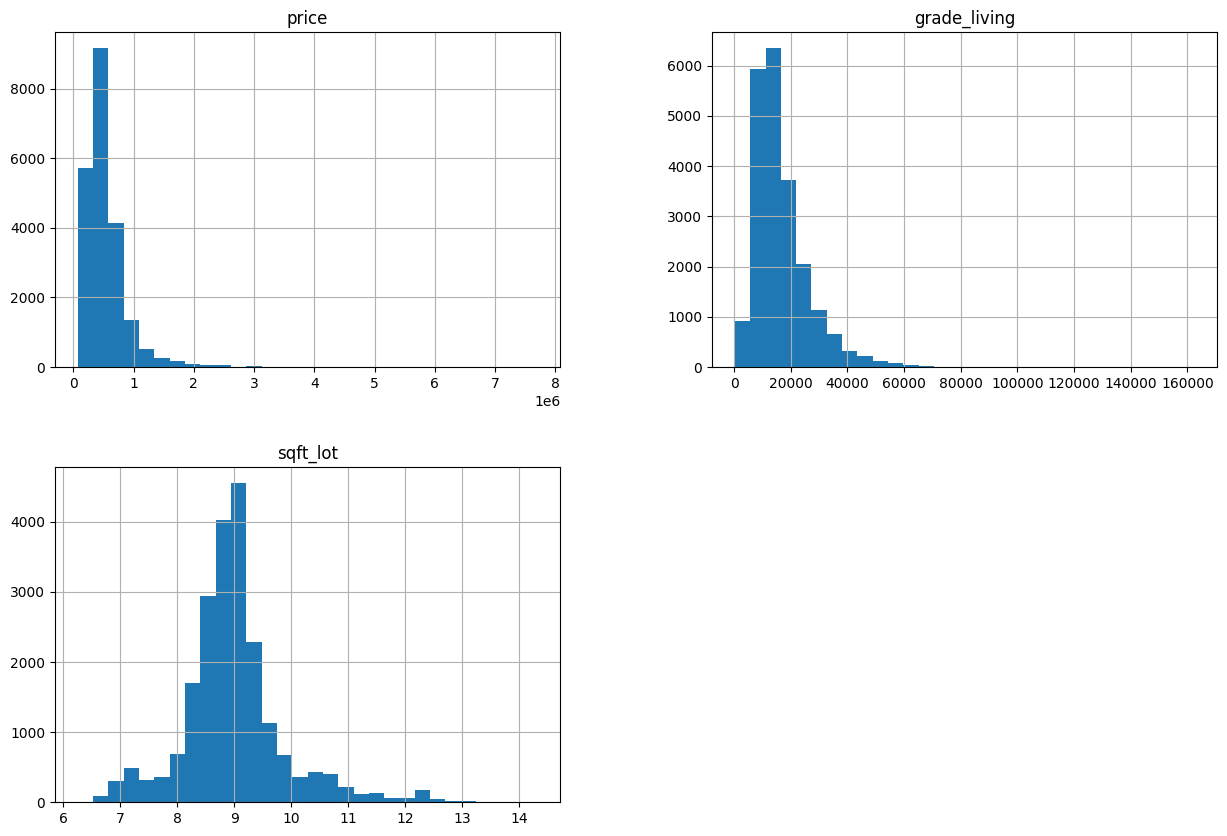

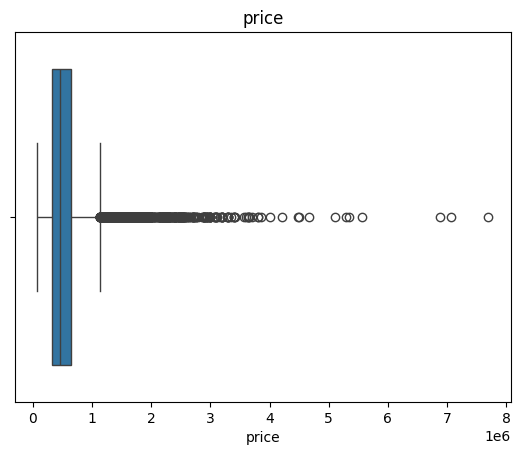

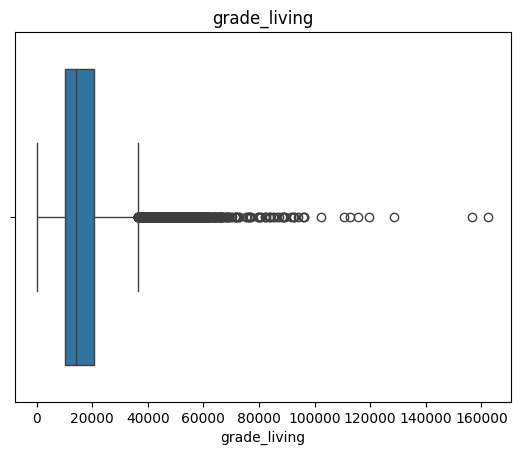

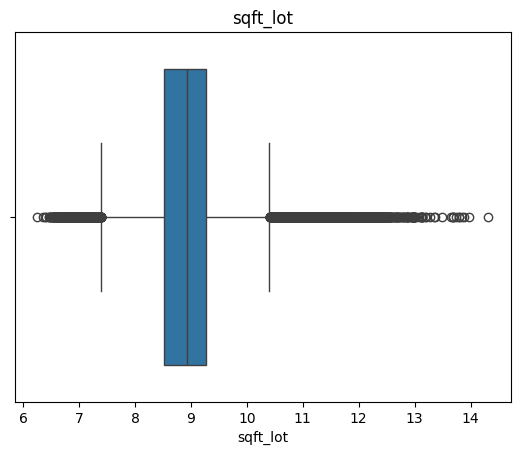

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df_test[['price', 'grade_living', 'sqft_lot']].hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots
for column in ['price', 'grade_living', 'sqft_lot']:
    sns.boxplot(x=df_test[column])
    plt.title(column)
    plt.show()


In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Check for non-positive values
if (df['price'] <= 0).any() or (df['grade_living'] <= 0).any():
    # Use Yeo-Johnson transformation for non-positive values
    pt = PowerTransformer(method='yeo-johnson')
    df[['price_transformed', 'grade_living_transformed']] = pt.fit_transform(df[['price', 'grade_living']])
else:
    # Use Box-Cox transformation for positive values
    df['price_transformed'], _ = boxcox(df['price'])
    df['grade_living_transformed'], _ = boxcox(df['grade_living'])

# Alternatively, use PowerTransformer for all features
pt = PowerTransformer(method='yeo-johnson')
df[['price_transformed', 'grade_living_transformed']] = pt.fit_transform(df[['price', 'grade_living']])


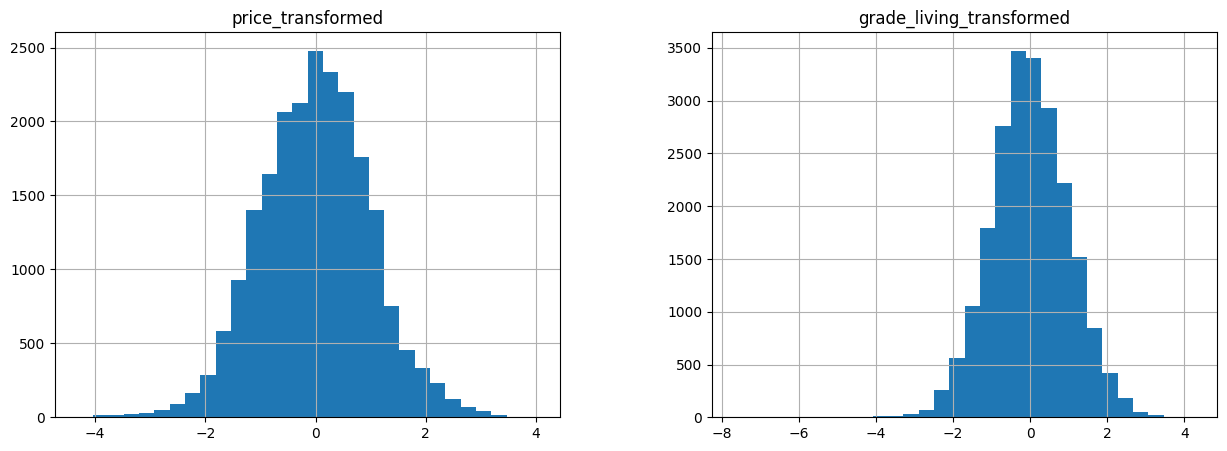

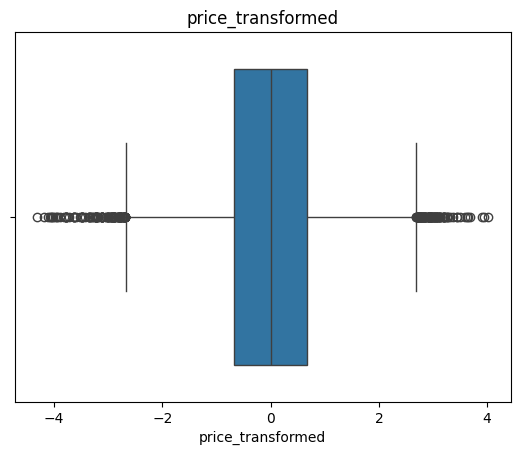

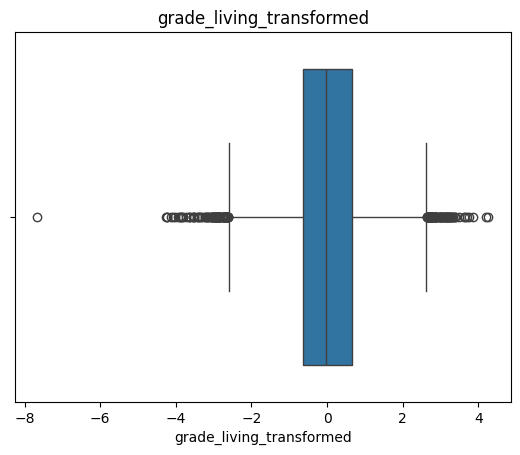

In [45]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check for non-positive values
if (df_test['price'] <= 0).any() or (df_test['grade_living'] <= 0).any():
    # Use Yeo-Johnson transformation for non-positive values
    pt = PowerTransformer(method='yeo-johnson')
    df_test[['price_transformed', 'grade_living_transformed']] = pt.fit_transform(df_test[['price', 'grade_living']])
else:
    # Use Box-Cox transformation for positive values
    df_test['price_transformed'], _ = boxcox(df_test['price'])
    df_test['grade_living_transformed'], _ = boxcox(df_test['grade_living'])

# Alternatively, use PowerTransformer for all features
pt = PowerTransformer(method='yeo-johnson')
df_test[['price_transformed', 'grade_living_transformed']] = pt.fit_transform(df_test[['price', 'grade_living']])

# Visualize Transformed Distributions
# Histograms after transformation
df_test[['price_transformed', 'grade_living_transformed']].hist(bins=30, figsize=(15, 5))
plt.show()

# Box plots after transformation
for column in ['price_transformed', 'grade_living_transformed']:
    sns.boxplot(x=df_test[column])
    plt.title(column)
    plt.show()

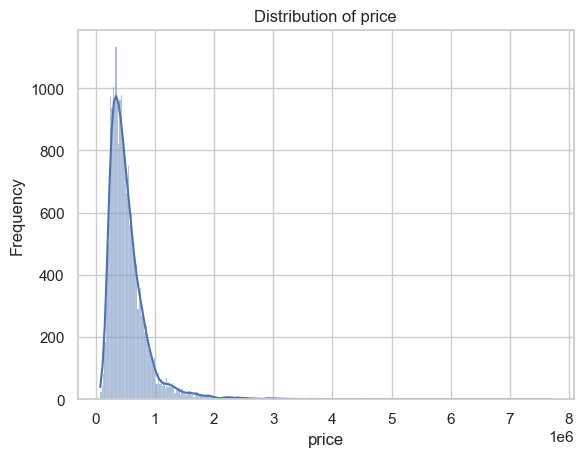

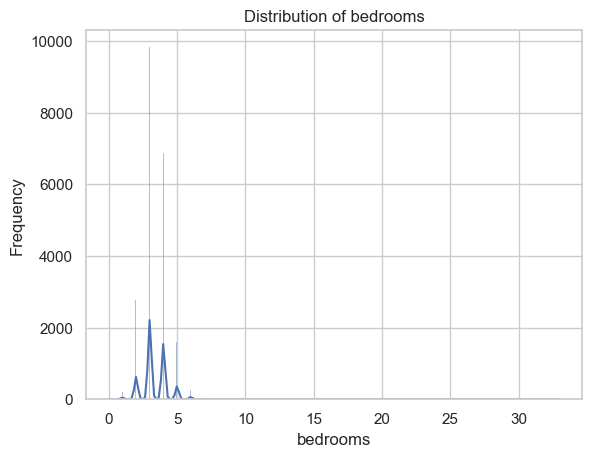

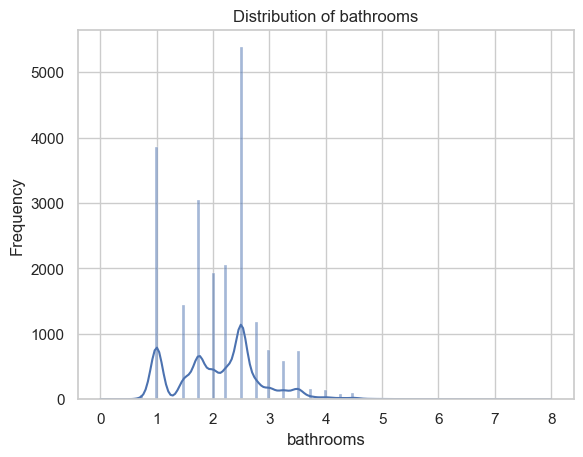

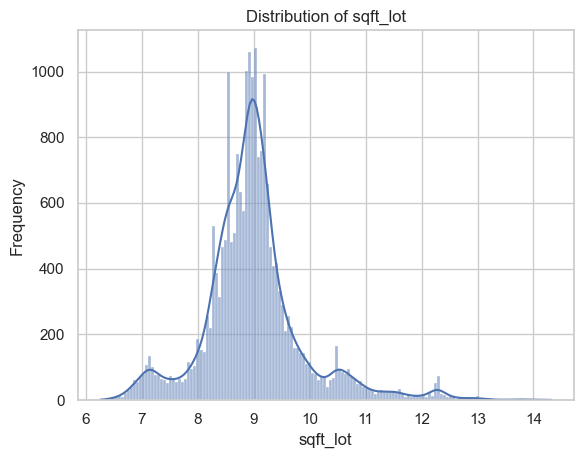

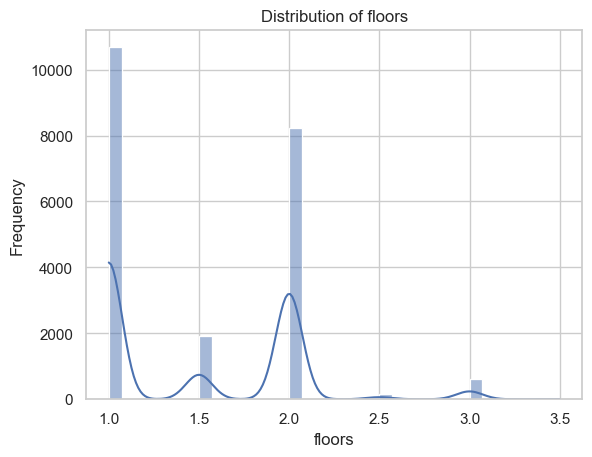

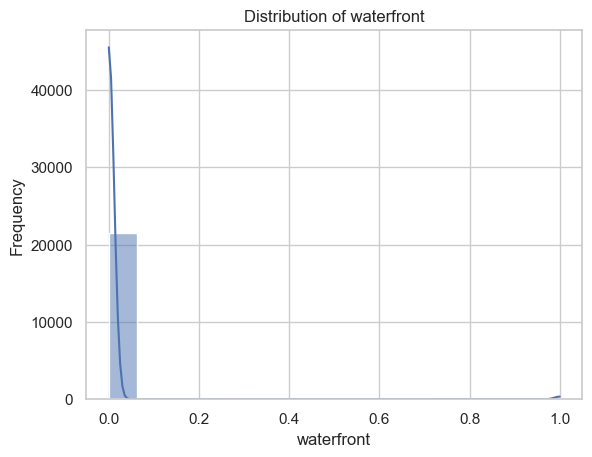

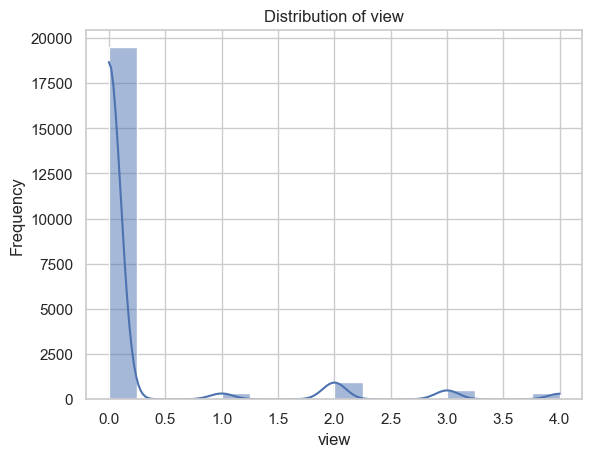

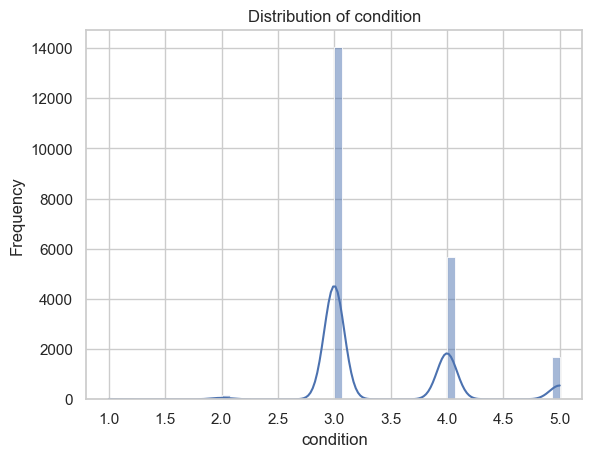

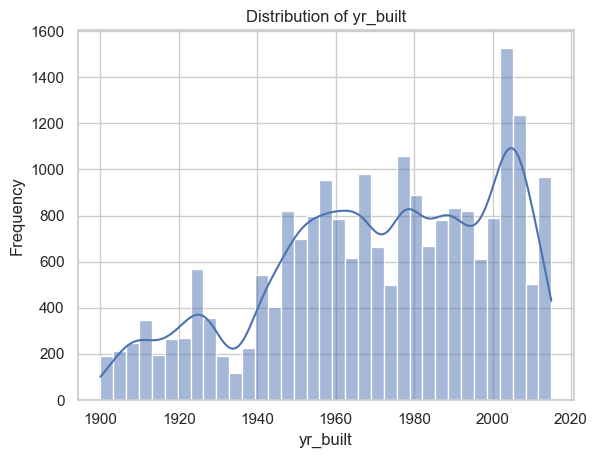

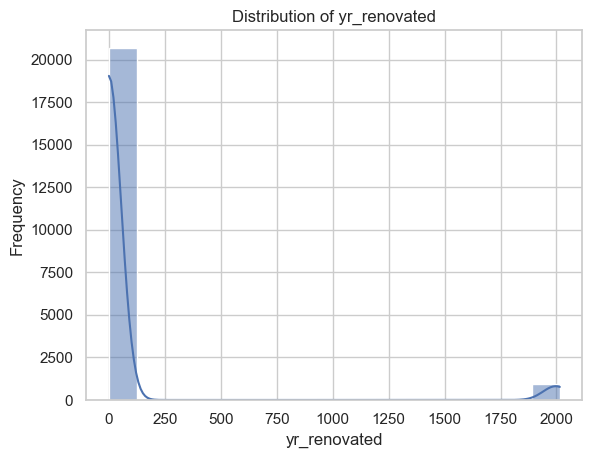

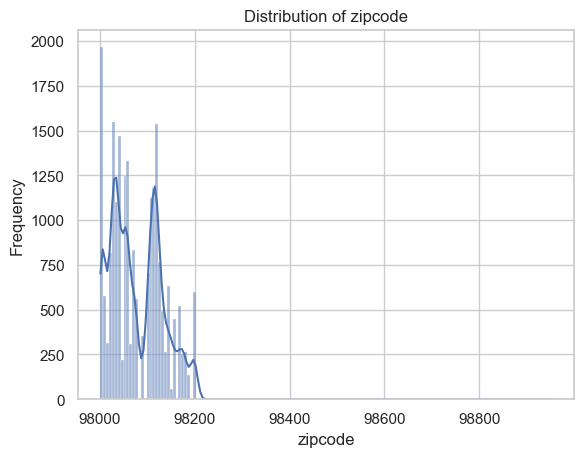

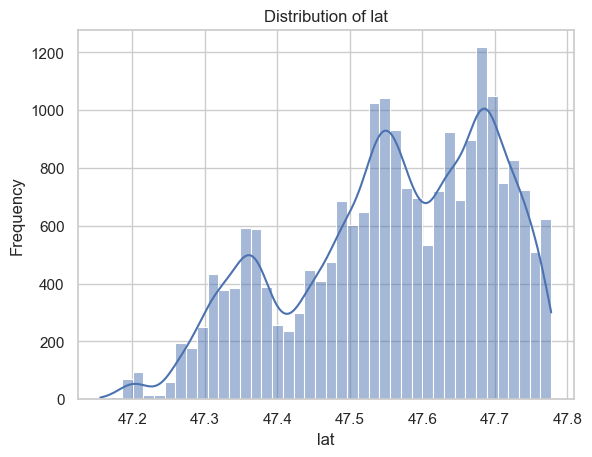

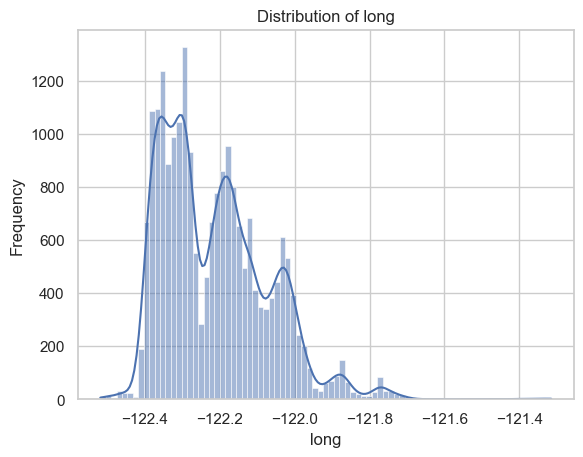

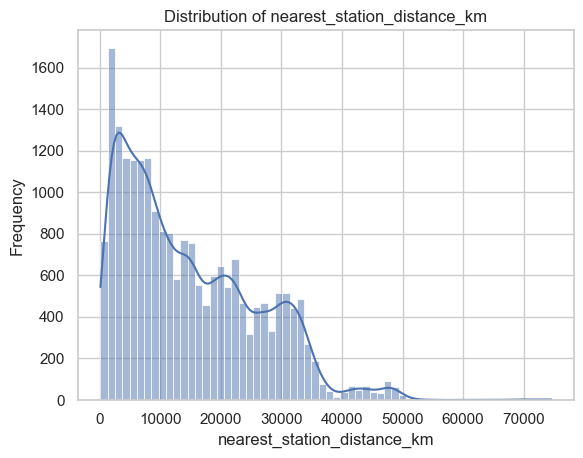

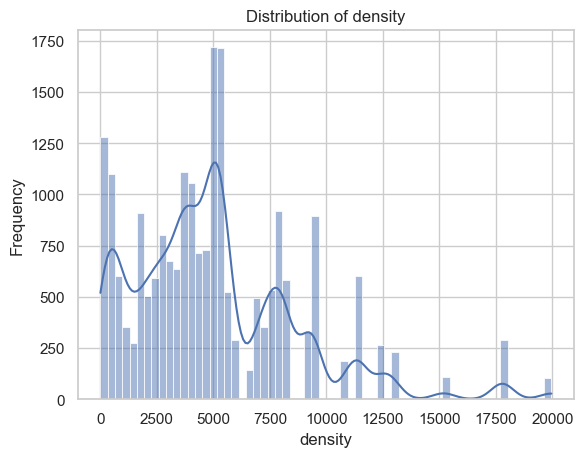

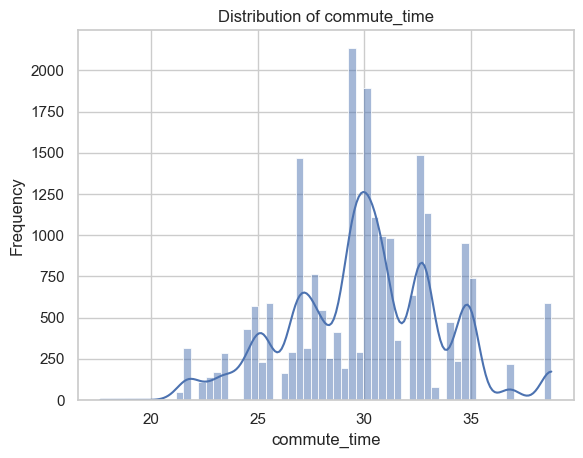

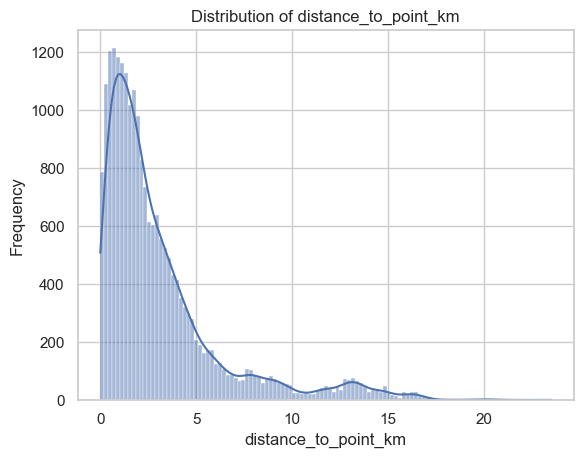

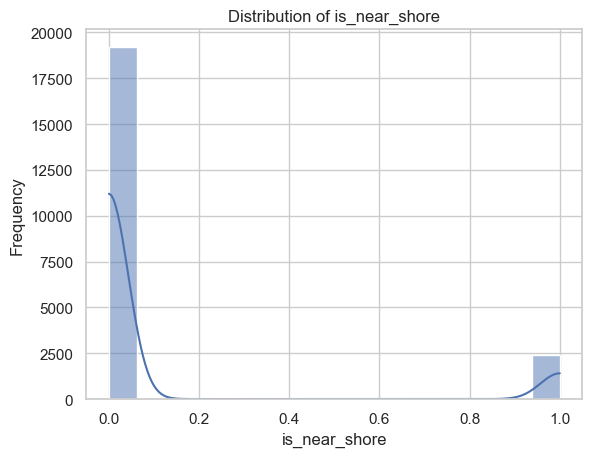

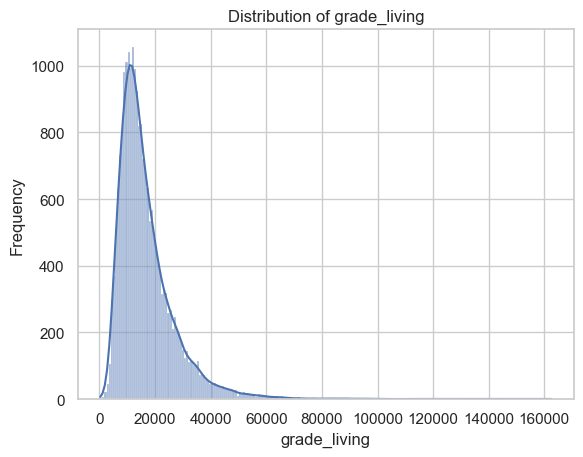

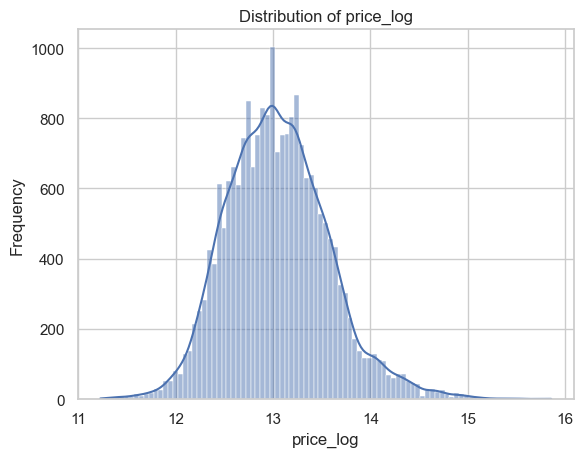

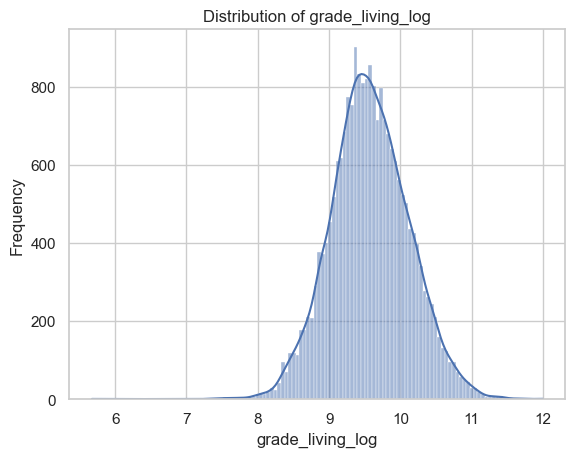

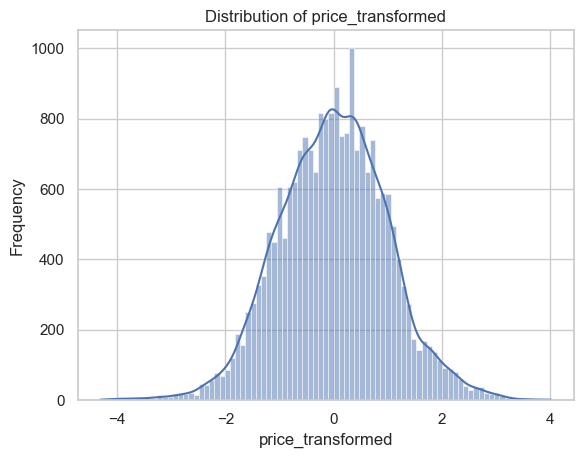

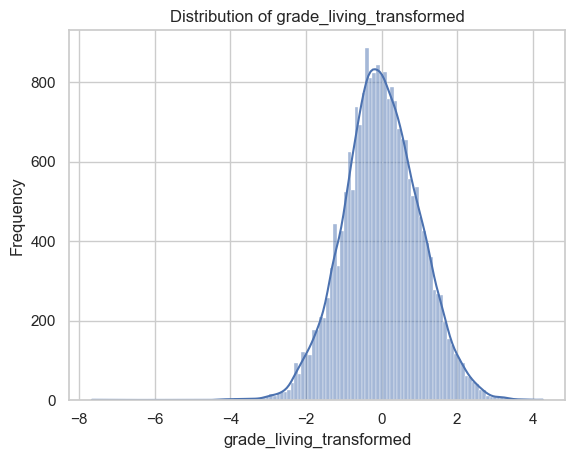

price: Sample does not look Gaussian (reject H0)
bedrooms: Sample does not look Gaussian (reject H0)
bathrooms: Sample does not look Gaussian (reject H0)
sqft_lot: Sample does not look Gaussian (reject H0)
floors: Sample does not look Gaussian (reject H0)
waterfront: Sample does not look Gaussian (reject H0)
view: Sample does not look Gaussian (reject H0)
condition: Sample does not look Gaussian (reject H0)
yr_built: Sample does not look Gaussian (reject H0)
yr_renovated: Sample does not look Gaussian (reject H0)
zipcode: Sample does not look Gaussian (reject H0)
lat: Sample does not look Gaussian (reject H0)
long: Sample does not look Gaussian (reject H0)
nearest_station_distance_km: Sample does not look Gaussian (reject H0)
density: Sample does not look Gaussian (reject H0)
commute_time: Sample does not look Gaussian (reject H0)
distance_to_point_km: Sample does not look Gaussian (reject H0)
is_near_shore: Sample does not look Gaussian (reject H0)
grade_living: Sample does not look G

/var/folders/m7/snhszr993kscmjx9dwlff1lm0000gn/T/ipykernel_8222/2851701324.py:15: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21613.
  stat, p = stats.shapiro(df_test[column])


In [46]:
import seaborn as sns
from scipy import stats

# Visualize feature distributions
sns.set(style="whitegrid")
for column in df_test.columns:
    sns.histplot(df_test[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Perform Shapiro-Wilk test for normality
for column in df_test.columns:
    stat, p = stats.shapiro(df_test[column])
    alpha = 0.05
    if p > alpha:
        print(f'{column}: Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{column}: Sample does not look Gaussian (reject H0)')
